## Imports

In [0]:
!pip install pgeocode
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pgeocode
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix,roc_curve,auc,accuracy_score,roc_auc_score,classification_report
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data=pd.read_csv(r'/content/drive/My Drive/Train_gQ1XM0h.csv')

In [0]:
data.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,Level 1,Level 1,2.0,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,Level 1,Level 3,4.0,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,Level 1,Level 1,2.0,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [0]:
data['Business_Sourced'].value_counts(normalize=True)

0    0.65708
1    0.34292
Name: Business_Sourced, dtype: float64

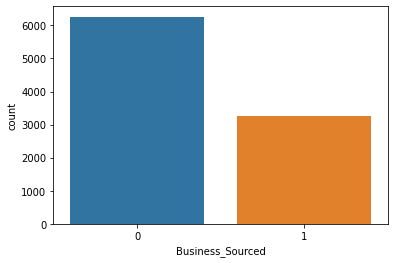

In [0]:
sns.countplot(data['Business_Sourced'])

In [0]:
data.shape

(9527, 23)

In [0]:
data.isnull().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               97
Applicant_Gender                 67
Applicant_BirthDate              73
Applicant_Marital_Status         73
Applicant_Occupation           1221
Applicant_Qualification          86
Manager_DOJ                     683
Manager_Joining_Designation     683
Manager_Current_Designation     683
Manager_Grade                   683
Manager_Status                  683
Manager_Gender                  683
Manager_DoB                     683
Manager_Num_Application         683
Manager_Num_Coded               683
Manager_Business                683
Manager_Num_Products            683
Manager_Business2               683
Manager_Num_Products2           683
Business_Sourced                  0
dtype: int64

## Feature Transformation & Engineering

### Dealing with missing values

In [0]:
for i in data.index:
    if(len(str(data['Applicant_City_PIN'][i]))<6):
        data['Applicant_City_PIN'][i]=data['Office_PIN'][i]
data['Applicant_Gender'].fillna(data['Applicant_Gender'].mode()[0],inplace=True)    
data['Applicant_BirthDate'].fillna(data['Applicant_BirthDate'].mode()[0],inplace=True)
data['Applicant_Marital_Status'].fillna(data['Applicant_Marital_Status'].mode()[0],inplace=True)
data['Applicant_Occupation'].fillna(data['Applicant_Occupation'].mode()[0],inplace=True)
data['Applicant_Qualification'].fillna(data['Applicant_Qualification'].mode()[0],inplace=True)
data['Manager_DOJ'].fillna(data['Manager_DOJ'].mode()[0],inplace=True)
data['Manager_Joining_Designation'].fillna(data['Manager_Joining_Designation'].mode()[0],inplace=True)
data['Manager_Current_Designation'].fillna(data['Manager_Current_Designation'].mode()[0],inplace=True)
data['Manager_Grade'].fillna(data['Manager_Grade'].mode()[0],inplace=True)
data['Manager_Status'].fillna(data['Manager_Status'].mode()[0],inplace=True)
data['Manager_Gender'].fillna(data['Manager_Gender'].mode()[0],inplace=True)
data['Manager_DoB'].fillna(data['Manager_DoB'].mode()[0],inplace=True)
data['Manager_Num_Application'].fillna(data['Manager_Num_Application'].mode()[0],inplace=True)
data['Manager_Num_Coded'].fillna(data['Manager_Num_Coded'].mode()[0],inplace=True)
data['Manager_Business'].fillna(data['Manager_Business'].median(),inplace=True)
data['Manager_Num_Products'].fillna(data['Manager_Num_Products'].median(),inplace=True)
data['Manager_Business2'].fillna(data['Manager_Business2'].median(),inplace=True)
data['Manager_Num_Products2'].fillna(data['Manager_Num_Products2'].median(),inplace=True)
#data.dropna(how='any',inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
data.isnull().sum()

ID                             0
Office_PIN                     0
Application_Receipt_Date       0
Applicant_City_PIN             0
Applicant_Gender               0
Applicant_BirthDate            0
Applicant_Marital_Status       0
Applicant_Occupation           0
Applicant_Qualification        0
Manager_DOJ                    0
Manager_Joining_Designation    0
Manager_Current_Designation    0
Manager_Grade                  0
Manager_Status                 0
Manager_Gender                 0
Manager_DoB                    0
Manager_Num_Application        0
Manager_Num_Coded              0
Manager_Business               0
Manager_Num_Products           0
Manager_Business2              0
Manager_Num_Products2          0
Business_Sourced               0
dtype: int64

### Feature Engineering

In [0]:
data['Application_Ranking']=0
rank=0
for i in data.index:
    if i==0:
        rank+=1
        data['Application_Ranking'][i]=rank
    else:
        if(data['Application_Receipt_Date'][i]==data['Application_Receipt_Date'][i-1]):
            rank+=1
            data['Application_Ranking'][i]=rank
        else:
            rank=1 
            data['Application_Ranking'][i]=rank

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


- Creating an application ranking variable which denotes the order in which applications are received throughout the day.

In [0]:
data[['Application_Receipt_Date','Application_Ranking']].iloc[70:90]

,Application_Receipt_Date,Application_Ranking
70,4/16/2007,71
71,4/16/2007,72
72,4/16/2007,73
73,4/16/2007,74
74,4/16/2007,75
75,4/16/2007,76
76,4/16/2007,77
77,4/16/2007,78
78,4/16/2007,79
79,4/17/2007,1


In [0]:
data['Application_Ranking']=(data['Application_Ranking']-min(data['Application_Ranking']))/(max(data['Application_Ranking'])-min(data['Application_Ranking']))

In [0]:
data['Application_Ranking'].describe()

count    9527.000000
mean        0.116517
std         0.113504
min         0.000000
25%         0.036585
50%         0.085366
75%         0.158537
max         1.000000
Name: Application_Ranking, dtype: float64

- Normalizing the application ranking variable so that the values are between [0,1].

In [0]:
data['Application_Receipt_Date']=pd.to_datetime(data['Application_Receipt_Date'])
data['Application_Receipt_daynum']=data['Application_Receipt_Date'].dt.dayofweek
data['Application_Receipt_month']=data['Application_Receipt_Date'].dt.month
data['Applicant_BirthDate']=pd.to_datetime(data['Applicant_BirthDate'])
data['Manager_DOJ']=pd.to_datetime(data['Manager_DOJ'])
data['Manager_DoB']=pd.to_datetime(data['Manager_DoB'])

In [0]:
data['Applicant_Age'] = data.apply(lambda x: (x['Application_Receipt_Date'] - x['Applicant_BirthDate']).days/365, axis=1)
data['Manager_Age'] = data.apply(lambda x: (x['Application_Receipt_Date'] - x['Manager_DoB']).days/365, axis=1)
data['Manager_YearsInOffice'] = data.apply(lambda x: (x['Application_Receipt_Date'] - x['Manager_DOJ']).days/365, axis=1)

- Finding the manager's age, applicants's age and number of years of the manager in the office.

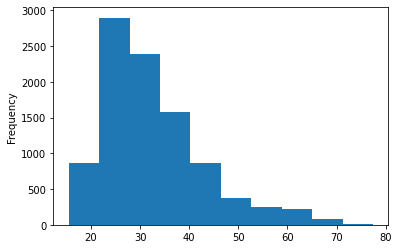

In [0]:
data['Applicant_Age'].plot.hist()

In [0]:
data['Applicant_Age']=data['Applicant_Age'].map(lambda x:20 if x<20 else x)

In [0]:
data['Applicant_Age']=data['Applicant_Age'].map(lambda x:58 if x>58 else x)

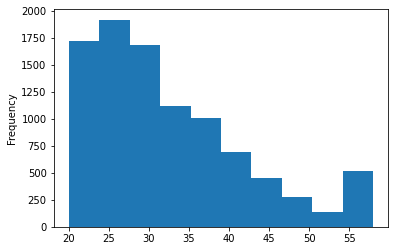

In [0]:
data['Applicant_Age'].plot.hist()

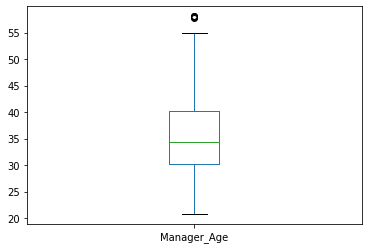

In [0]:
data['Manager_Age'].plot.box()

In [0]:
data['Manager_Age']=data['Manager_Age'].map(lambda x:23 if x<23 else x)

In [0]:
data['Manager_Age']=data['Manager_Age'].map(lambda x:58 if x>58 else x)

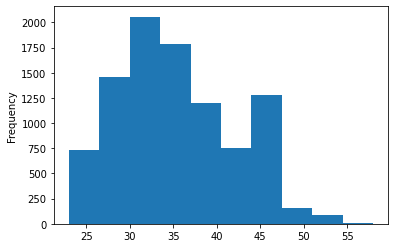

In [0]:
data['Manager_Age'].plot.hist()

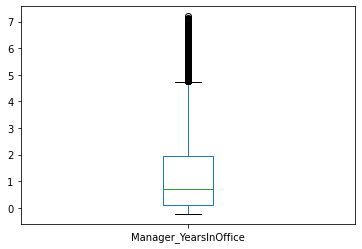

In [0]:
data['Manager_YearsInOffice'].plot.box()

In [0]:
data['Manager_YearsInOffice']=data['Manager_YearsInOffice'].map(lambda x:0 if x<0 else x)

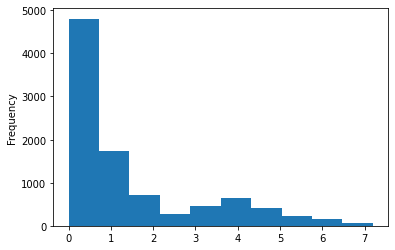

In [0]:
data['Manager_YearsInOffice'].plot.hist()

In [0]:
data[['Applicant_Age','Manager_Age','Manager_YearsInOffice']].head()

,Applicant_Age,Manager_Age,Manager_YearsInOffice
0,35.347945,29.178082,1.430137
1,24.175342,29.178082,1.430137
2,41.273973,38.145205,0.887671
3,20.000000,28.690411,3.654795
4,21.797260,36.210959,0.939726


In [0]:
dist = pgeocode.GeoDistance('in')

In [0]:
data['distance']=float(np.NaN)

In [0]:
for i in data.index:
    d=float(dist.query_postal_code(str(data['Office_PIN'][i]), str(int(data['Applicant_City_PIN'][i]))))
    data['distance'][i]=d

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
data['distance']=data['distance'].fillna(data['distance'].median())

- Finding the distance between the applicant's city and the office.

In [0]:
data.dtypes

ID                                     object
Office_PIN                              int64
Application_Receipt_Date       datetime64[ns]
Applicant_City_PIN                    float64
Applicant_Gender                       object
Applicant_BirthDate            datetime64[ns]
Applicant_Marital_Status               object
Applicant_Occupation                   object
Applicant_Qualification                object
Manager_DOJ                    datetime64[ns]
Manager_Joining_Designation            object
Manager_Current_Designation            object
Manager_Grade                         float64
Manager_Status                         object
Manager_Gender                         object
Manager_DoB                    datetime64[ns]
Manager_Num_Application               float64
Manager_Num_Coded                     float64
Manager_Business                      float64
Manager_Num_Products                  float64
Manager_Business2                     float64
Manager_Num_Products2             

In [0]:
pincode_same,distance_zero=[],[]
pincode_same_count,distance_zero_count=0,0
for i in data.index:
    v
    if(data['Office_PIN'][i]==int(data['Applicant_City_PIN'][i])):
        pincode_same.append('Yes')
        pincode_same_count+=1
    else:
        pincode_same.append('No')  
    if(data['distance'][i]==0):
        distance_zero.append('Yes')
        distance_zero_count+=1
    else:
        distance_zero.append('No')
print('Pincode same:',pincode_same_count)
print('Distance zero:',distance_zero_count)    

Pincode same: 1461
Distance zero: 1810


- Checking consistency in the distance varaible.

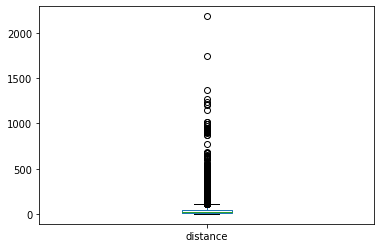

In [0]:
data['distance'].plot.box()

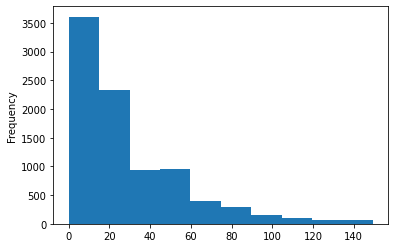

In [0]:
data[data['distance']<150]['distance'].plot.hist()

In [0]:
data['distance'] = data.distance.map(lambda x: 150 if x >150 else x)

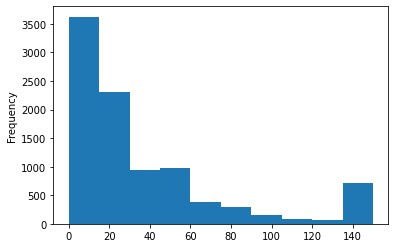

In [0]:
data['distance'].plot.hist()

In [0]:
for i in data.index:
    if(data['Manager_Num_Coded'][i]>data['Manager_Num_Application'][i]):
        data['Manager_Num_Coded'][i]=data['Manager_Num_Application'][i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
data['Manager_Num_Converted']=data['Manager_Num_Application']-data['Manager_Num_Coded']

- Finding how many applications got converted managers.

In [0]:
data[data['Manager_Num_Converted']<0].shape

(0, 31)

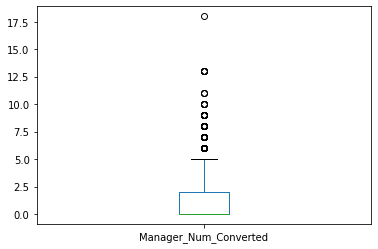

In [0]:
data['Manager_Num_Converted'].plot.box()

In [0]:
data['Manager_Num_Converted']=data['Manager_Num_Converted'].map(lambda x:5 if x>5 else x)

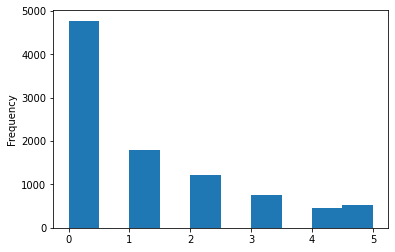

In [0]:
data['Manager_Num_Converted'].plot.hist()

In [0]:
data.columns

Index(['ID', 'Office_PIN', 'Application_Receipt_Date', 'Applicant_City_PIN',
       'Applicant_Gender', 'Applicant_BirthDate', 'Applicant_Marital_Status',
       'Applicant_Occupation', 'Applicant_Qualification', 'Manager_DOJ',
       'Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Status', 'Manager_Gender', 'Manager_DoB',
       'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
       'Manager_Num_Products', 'Manager_Business2', 'Manager_Num_Products2',
       'Business_Sourced', 'Application_Ranking', 'Application_Receipt_daynum',
       'Application_Receipt_month', 'Applicant_Age', 'Manager_Age',
       'Manager_YearsInOffice', 'distance', 'Manager_Num_Converted'],
      dtype='object')

In [0]:
cols_to_keep=['Office_PIN','Applicant_City_PIN','Applicant_Gender','Applicant_Occupation','Manager_Joining_Designation',
              'Manager_Current_Designation','Manager_Gender','Manager_Num_Application','Manager_Num_Coded','Manager_Num_Converted',
              'Manager_Num_Products','Manager_Business','distance','Applicant_Age','Manager_Age','Application_Ranking',
              'Manager_YearsInOffice','Application_Receipt_month','Application_Receipt_daynum','Business_Sourced']

In [0]:
final_data=data[cols_to_keep]

In [0]:
final_data.head()

,Office_PIN,Applicant_City_PIN,Applicant_Gender,Applicant_Occupation,Manager_Joining_Designation,Manager_Current_Designation,Manager_Gender,Manager_Num_Application,Manager_Num_Coded,Manager_Num_Converted,Manager_Num_Products,Manager_Business,distance,Applicant_Age,Manager_Age,Application_Ranking,Manager_YearsInOffice,Application_Receipt_month,Application_Receipt_daynum,Business_Sourced
0,842001,844120.0,M,Others,Level 1,Level 2,M,2.0,1.0,1.0,28.0,335249.0,150.000000,35.347945,29.178082,0.000000,1.430137,4,0,0
1,842001,844111.0,M,Others,Level 1,Level 2,M,2.0,1.0,1.0,28.0,335249.0,150.000000,24.175342,29.178082,0.006098,1.430137,4,0,1
2,800001,844101.0,M,Business,Level 1,Level 1,M,0.0,0.0,0.0,24.0,357184.0,29.264576,41.273973,38.145205,0.012195,0.887671,4,0,0
3,814112,814112.0,M,Salaried,Level 1,Level 3,F,0.0,0.0,0.0,22.0,318356.0,0.000000,20.000000,28.690411,0.018293,3.654795,4,0,0
4,814112,815351.0,M,Others,Level 1,Level 1,M,2.0,1.0,1.0,17.0,230402.0,45.155843,21.797260,36.210959,0.024390,0.939726,4,0,0


### Encoding the categorical variables

In [0]:
final_data['Applicant_Gender'].value_counts()

M    7246
F    2281
Name: Applicant_Gender, dtype: int64

In [0]:
final_data['Applicant_Gender'].replace({'M':0,'F':1},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
final_data['Manager_Gender'].value_counts()

M    8310
F    1217
Name: Manager_Gender, dtype: int64

In [0]:
final_data['Manager_Gender'].replace({'M':0,'F':1},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
final_data['Applicant_Occupation'].value_counts()

Salaried         5008
Business         2303
Others           1966
Self Employed     149
Student           101
Name: Applicant_Occupation, dtype: int64

In [0]:
final_data['Applicant_Occupation'].replace('Self Employed','Others',inplace=True)
final_data['Applicant_Occupation'].replace('Student','Others',inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
final_data['Applicant_Occupation'].value_counts()

Salaried    5008
Business    2303
Others      2216
Name: Applicant_Occupation, dtype: int64

In [0]:
final_data['Applicant_Occupation'].replace({'Salaried':0,'Business':1,'Others':2},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
final_data['Manager_Joining_Designation'].value_counts()

Level 1    5315
Level 2    2787
Level 3    1146
Level 4     200
Other        58
Level 6      18
Level 7       2
Level 5       1
Name: Manager_Joining_Designation, dtype: int64

In [0]:
final_data['Manager_Joining_Designation'].replace('Level 1',1,inplace=True)
final_data['Manager_Joining_Designation'].replace('Level 2',2,inplace=True)
final_data['Manager_Joining_Designation'].replace('Level 3',3,inplace=True)
final_data['Manager_Joining_Designation'].replace('Level 4',4,inplace=True)
final_data['Manager_Joining_Designation'].replace('Other',5,inplace=True)
final_data['Manager_Joining_Designation'].replace('Level 5',5,inplace=True)
final_data['Manager_Joining_Designation'].replace('Level 6',5,inplace=True)
final_data['Manager_Joining_Designation'].replace('Level 7',5,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
final_data['Manager_Current_Designation'].value_counts()

Level 2    3891
Level 1    2479
Level 3    2033
Level 4    1031
Level 5      93
Name: Manager_Current_Designation, dtype: int64

In [0]:
final_data['Manager_Current_Designation'].replace('Level 1',1,inplace=True)
final_data['Manager_Current_Designation'].replace('Level 2',2,inplace=True)
final_data['Manager_Current_Designation'].replace('Level 3',3,inplace=True)
final_data['Manager_Current_Designation'].replace('Level 4',4,inplace=True)
final_data['Manager_Current_Designation'].replace('Level 5',5,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
final_data['Manager_Current_Designation'].value_counts()

2    3891
1    2479
3    2033
4    1031
5      93
Name: Manager_Current_Designation, dtype: int64

In [0]:
final_data['Manager_Performance']=(final_data['Manager_Current_Designation']-final_data['Manager_Joining_Designation'])/final_data['Manager_YearsInOffice']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


- Creating a manager performance variable by finding the difference between the current and joining designation of a manager and dividing it by the number of years spent by the manager in the office.

In [0]:
final_data['Manager_Performance'].fillna(final_data['Manager_Performance'].median(),inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


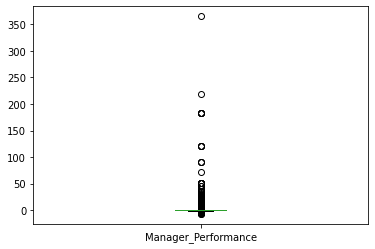

In [0]:
final_data['Manager_Performance'].plot.box()

In [0]:
final_data['Manager_Performance']=final_data['Manager_Performance'].map(lambda x:0 if x<0 else x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
final_data['Manager_Performance']=final_data['Manager_Performance'].map(lambda x:2 if x>2 else x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


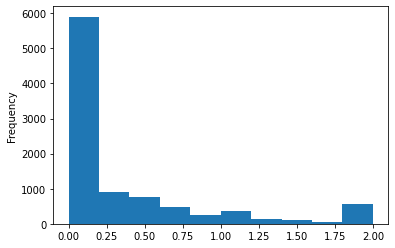

In [0]:
final_data['Manager_Performance'].plot.hist()

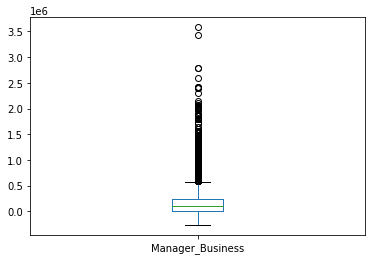

In [0]:
final_data['Manager_Business'].plot.box()

In [0]:
final_data['Manager_Business']=final_data['Manager_Business'].map(lambda x:0 if x<0 else x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
final_data['Manager_Business']=final_data['Manager_Business'].map(lambda x:600000 if x>600000 else x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


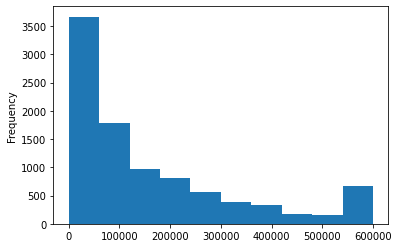

In [0]:
final_data['Manager_Business'].plot.hist()

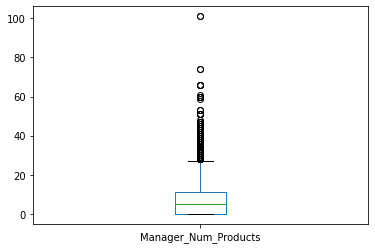

In [0]:
final_data['Manager_Num_Products'].plot.box()

In [0]:
final_data['Manager_Num_Products']=final_data['Manager_Num_Products'].map(lambda x:30 if x>30 else x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


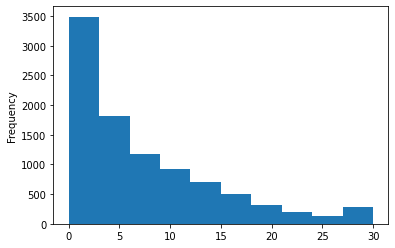

In [0]:
final_data['Manager_Num_Products'].plot.hist()

In [0]:
final_data.head()

,Office_PIN,Applicant_City_PIN,Applicant_Gender,Applicant_Occupation,Manager_Joining_Designation,Manager_Current_Designation,Manager_Gender,Manager_Num_Application,Manager_Num_Coded,Manager_Num_Converted,Manager_Num_Products,Manager_Business,distance,Applicant_Age,Manager_Age,Application_Ranking,Manager_YearsInOffice,Application_Receipt_month,Application_Receipt_daynum,Business_Sourced,Manager_Performance
0,842001,844120.0,0,2,1,2,0,2.0,1.0,1.0,28.0,335249.0,150.000000,35.347945,29.178082,0.000000,1.430137,4,0,0,0.699234
1,842001,844111.0,0,2,1,2,0,2.0,1.0,1.0,28.0,335249.0,150.000000,24.175342,29.178082,0.006098,1.430137,4,0,1,0.699234
2,800001,844101.0,0,1,1,1,0,0.0,0.0,0.0,24.0,357184.0,29.264576,41.273973,38.145205,0.012195,0.887671,4,0,0,0.000000
3,814112,814112.0,0,0,1,3,1,0.0,0.0,0.0,22.0,318356.0,0.000000,20.000000,28.690411,0.018293,3.654795,4,0,0,0.547226
4,814112,815351.0,0,2,1,1,0,2.0,1.0,1.0,17.0,230402.0,45.155843,21.797260,36.210959,0.024390,0.939726,4,0,0,0.000000


## Model Building

In [0]:
x=final_data.drop('Business_Sourced',axis=1)
y=final_data['Business_Sourced']

In [0]:
#x -= x.mean(axis=0)
#x /= x.std(axis=0)
for col in x.columns:
    x[col]=(x[col]-min(x[col]))/(max(x[col])-min(x[col]))
x.head()  

,Office_PIN,Applicant_City_PIN,Applicant_Gender,Applicant_Occupation,Manager_Joining_Designation,Manager_Current_Designation,Manager_Gender,Manager_Num_Application,Manager_Num_Coded,Manager_Num_Converted,Manager_Num_Products,Manager_Business,distance,Applicant_Age,Manager_Age,Application_Ranking,Manager_YearsInOffice,Application_Receipt_month,Application_Receipt_daynum,Manager_Performance
0,0.987721,0.828899,0.0,1.0,0.0,0.25,0.0,0.090909,0.111111,0.2,0.933333,0.558748,1.000000,0.403893,0.176517,0.000000,0.198781,0.272727,0.0,0.349617
1,0.987721,0.828888,0.0,1.0,0.0,0.25,0.0,0.090909,0.111111,0.2,0.933333,0.558748,1.000000,0.109877,0.176517,0.006098,0.198781,0.272727,0.0,0.349617
2,0.931048,0.828877,0.0,0.5,0.0,0.00,0.0,0.000000,0.000000,0.0,0.800000,0.595307,0.195097,0.559841,0.432720,0.012195,0.123382,0.272727,0.0,0.000000
3,0.950089,0.795016,0.0,0.0,0.0,0.50,1.0,0.000000,0.000000,0.0,0.733333,0.530593,0.000000,0.000000,0.162583,0.018293,0.507997,0.272727,0.0,0.273613
4,0.950089,0.796415,0.0,1.0,0.0,0.00,0.0,0.090909,0.111111,0.2,0.566667,0.384003,0.301039,0.047296,0.377456,0.024390,0.130617,0.272727,0.0,0.000000


In [0]:
x.shape,y.shape

((9527, 20), (9527,))

In [0]:
train_x,test_x,train_y,test_y = train_test_split(x, y , test_size = 0.25 , random_state = 50, stratify = y)

### Logistic Regression

In [0]:
reg = linear_model.LogisticRegression() 
reg.fit(train_x, train_y) 
y_predicted_test = reg.predict(test_x) 

In [0]:
# Use accuracy_score function to get the accuracy
print("Logistic regression Accuracy Score -> ",accuracy_score(y_predicted_test, test_y)*100)

Logistic regression Accuracy Score ->  74.93702770780857


In [0]:
#Classification report
print(classification_report(test_y, y_predicted_test))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1565
           1       0.66      0.55      0.60       817

    accuracy                           0.75      2382
   macro avg       0.72      0.70      0.71      2382
weighted avg       0.74      0.75      0.74      2382



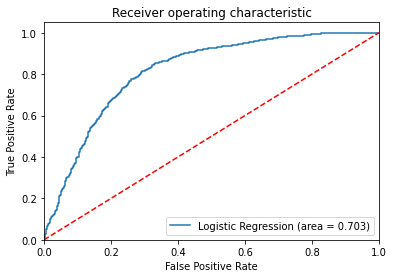

In [0]:
# AUC ROC for Logistic Regression

roc_auc = roc_auc_score(test_y, y_predicted_test)
fpr, tpr, thresholds = roc_curve(test_y, reg.predict_proba(test_x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

- This model is not performing well.

### Random Forest

In [0]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0,min_samples_split=15,max_depth=25)
#Training the model on train data
rf_clf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

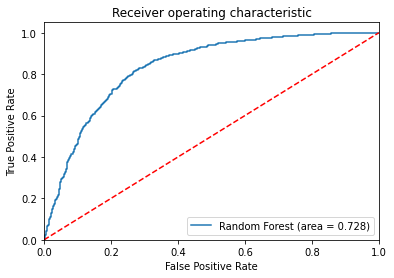

In [0]:
# AUC ROC for Random Forest
y_predicted_test=rf_clf.predict(test_x)
roc_auc = roc_auc_score(test_y, y_predicted_test)
fpr, tpr, thresholds = roc_curve(test_y, rf_clf.predict_proba(test_x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [0]:
# Use accuracy_score function to get the accuracy
y_predicted_test=rf_clf.predict(test_x)
print("Random Forest Accuracy Score -> ",accuracy_score(y_predicted_test,test_y)*100)

Random Forest Accuracy Score ->  76.91015952980689


In [0]:
#Classification report
print(classification_report(test_y, y_predicted_test))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1565
           1       0.69      0.60      0.64       817

    accuracy                           0.77      2382
   macro avg       0.75      0.73      0.73      2382
weighted avg       0.76      0.77      0.76      2382



Text(0.5, 0, 'Relative Importance')

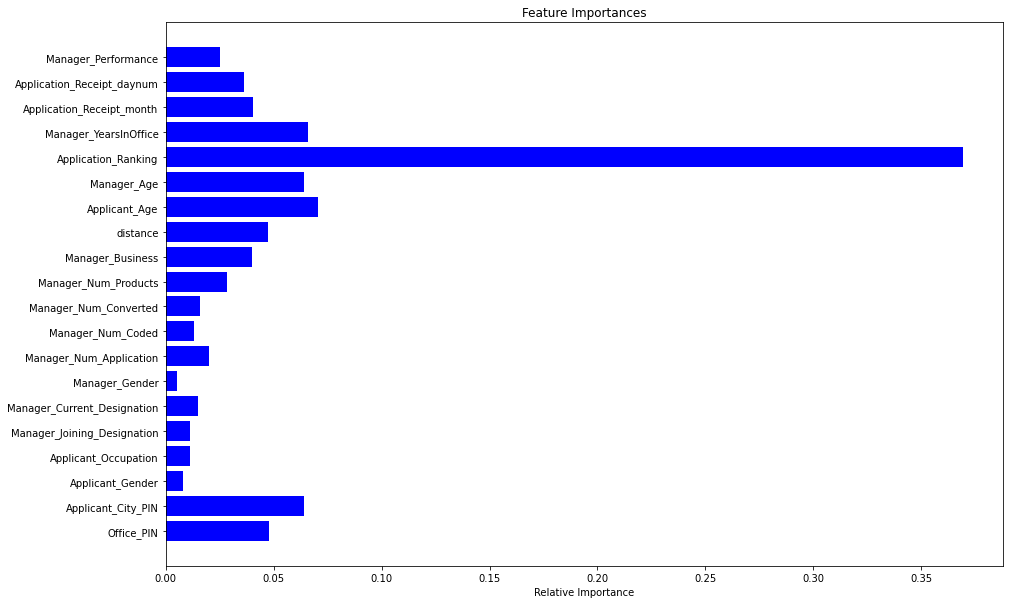

In [0]:
plt.figure(figsize=(15,10))
plt.title('Feature Importances')
plt.barh(train_x.columns, rf_clf.feature_importances_, color='b', align='center')
plt.yticks(train_x.columns)
plt.xlabel('Relative Importance')

- This model is giving an auc-roc of 0.724 which is decent.

### XGBoost

In [0]:
#Creating a xgboost classifier object with a random state for reproducible results
xg_clf = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.9, learning_rate = 0.4,
                max_depth = 25, alpha = 10, n_estimators = 100)
#Training the model on train data
xg_clf.fit(train_x,train_y)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              learning_rate=0.4, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

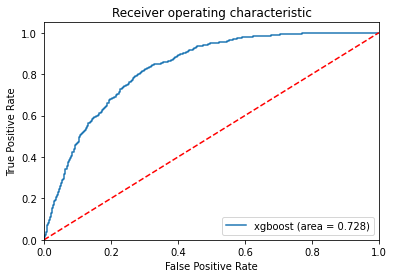

In [0]:
# AUC ROC for xgboost

roc_auc = roc_auc_score(test_y, y_predicted_test)
fpr, tpr, thresholds = roc_curve(test_y, xg_clf.predict_proba(test_x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='xgboost (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [0]:
# Use accuracy_score function to get the accuracy
y_predicted_test=xg_clf.predict(test_x)
print("xgboost Accuracy Score -> ",accuracy_score(y_predicted_test, test_y)*100)

xgboost Accuracy Score ->  75.77665827036104


In [0]:
#Classification report
print(classification_report(test_y, y_predicted_test))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1565
           1       0.66      0.60      0.63       817

    accuracy                           0.76      2382
   macro avg       0.73      0.72      0.72      2382
weighted avg       0.75      0.76      0.75      2382



- This model is giving an auc-roc of 0.704.

### Keras Binary Classification

In [0]:
from keras import models
from keras import layers
import tensorflow as tf

Using TensorFlow backend.


In [0]:
train_x.shape

(7145, 20)

In [0]:
train_x_tensor = np.asarray(train_x).astype('float32')
train_y_tensor = np.asarray(train_y).astype('float32')
test_x_tensor = np.asarray(test_x).astype('float32')
test_y_tensor = np.asarray(test_y).astype('float32')

In [0]:
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(20,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [236]:
history = model.fit(train_x_tensor[:5000],
train_y_tensor[:5000],
epochs=26,
batch_size=32,
validation_data=(train_x_tensor[5000:], train_y_tensor[5000:]))

Train on 5000 samples, validate on 2145 samples
Epoch 1/26
5000/5000 [==============================] - 1s 163us/step - loss: 0.6676 - accuracy: 0.6328 - val_loss: 0.6491 - val_accuracy: 0.6578
Epoch 2/26
5000/5000 [==============================] - 1s 130us/step - loss: 0.6453 - accuracy: 0.6568 - val_loss: 0.6431 - val_accuracy: 0.6578
Epoch 3/26
5000/5000 [==============================] - 1s 131us/step - loss: 0.6413 - accuracy: 0.6568 - val_loss: 0.6395 - val_accuracy: 0.6578
Epoch 4/26
5000/5000 [==============================] - 1s 136us/step - loss: 0.6369 - accuracy: 0.6568 - val_loss: 0.6362 - val_accuracy: 0.6578
Epoch 5/26
5000/5000 [==============================] - 1s 132us/step - loss: 0.6323 - accuracy: 0.6572 - val_loss: 0.6295 - val_accuracy: 0.6578
Epoch 6/26
5000/5000 [==============================] - 1s 127us/step - loss: 0.6257 - accuracy: 0.6584 - val_loss: 0.6210 - val_accuracy: 0.6569
Epoch 7/26
5000/5000 [==============================] - 1s 126us/step - loss

In [237]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

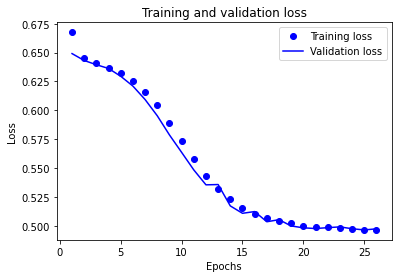

In [238]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [0]:
pred=model.predict(test_x)

In [0]:
prediction=[]
for p in pred:
    if p<0.5:
        prediction.append(0)
    else:
        prediction.append(1)  

In [241]:
# Use accuracy_score function to get the accuracy
print("Neural Network Accuracy Score -> ",accuracy_score(prediction, test_y)*100)

Neural Network Accuracy Score ->  75.73467674223342


In [242]:
#Classification report
print(classification_report(test_y, prediction))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1565
           1       0.65      0.64      0.64       817

    accuracy                           0.76      2382
   macro avg       0.73      0.73      0.73      2382
weighted avg       0.76      0.76      0.76      2382



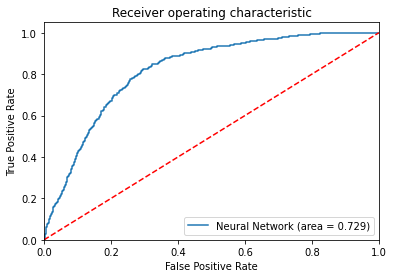

In [243]:
# AUC ROC for Neural Network

roc_auc = roc_auc_score(test_y, prediction)
fpr, tpr, thresholds = roc_curve(test_y, pred)
plt.figure()
plt.plot(fpr, tpr, label='Neural Network (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [244]:
#rf_clf.fit(x, y)
x_tensor = np.asarray(x).astype('float32')
y_tensor = np.asarray(y).astype('float32')
model.fit(x_tensor[:7000],
y_tensor[:7000],
epochs=25,
batch_size=32,
validation_data=(x_tensor[7000:], y_tensor[7000:]))

Train on 7000 samples, validate on 2527 samples
Epoch 1/25
7000/7000 [==============================] - 1s 131us/step - loss: 0.4882 - accuracy: 0.7589 - val_loss: 0.5145 - val_accuracy: 0.7293
Epoch 2/25
7000/7000 [==============================] - 1s 129us/step - loss: 0.4869 - accuracy: 0.7637 - val_loss: 0.5275 - val_accuracy: 0.7190
Epoch 3/25
7000/7000 [==============================] - 1s 130us/step - loss: 0.4865 - accuracy: 0.7636 - val_loss: 0.5175 - val_accuracy: 0.7281
Epoch 4/25
7000/7000 [==============================] - 1s 135us/step - loss: 0.4855 - accuracy: 0.7619 - val_loss: 0.5168 - val_accuracy: 0.7269
Epoch 5/25
7000/7000 [==============================] - 1s 134us/step - loss: 0.4849 - accuracy: 0.7631 - val_loss: 0.5305 - val_accuracy: 0.7159
Epoch 6/25
7000/7000 [==============================] - 1s 129us/step - loss: 0.4841 - accuracy: 0.7639 - val_loss: 0.5292 - val_accuracy: 0.7198
Epoch 7/25
7000/7000 [==============================] - 1s 128us/step - loss

- Training the best model on the complete data.

In [0]:
# All the preprocessing has already been done on the test data in a separate notebook for easy understanding.
test=pd.read_csv(r'/content/drive/My Drive/InitiateAI-Test.csv')

In [267]:
test.shape

(5045, 20)

In [0]:
#test=test-test.mean(axis=0)
#test=test/test.std(axis=0)
for col in test.columns:
    test[col]=(test[col]-min(test[col]))/(max(test[col])-min(test[col]))

In [0]:
#predictions=rf_clf.predict(test)
pred=model.predict(test)

In [0]:
predictions=[]
for p in pred:
    if p<0.5:
        predictions.append(0)
    else:
        predictions.append(1)  

In [275]:
ids=pd.read_csv(r'/content/drive/My Drive/Test_TIw7j6k.csv')
ids.head(1)

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2
0,FIN1009528,284001,7/2/2008,284001.0,M,8/5/1982,S,Salaried,Graduate,5/26/2008,Level 1,Level 1,2.0,Probation,F,10/14/1978,1.0,0.0,0.0,0.0,0.0,0.0


In [276]:
len(predictions)

5045

In [277]:
predictions

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [0]:
sam_sub=pd.DataFrame()
sam_sub['ID']=ids['ID']

In [279]:
sam_sub.head()

,ID
0,FIN1009528
1,FIN1009529
2,FIN1009530
3,FIN1009531
4,FIN1009532


In [0]:
sam_sub['Business_Sourced']=predictions

In [281]:
sam_sub.head()

,ID,Business_Sourced
0,FIN1009528,1
1,FIN1009529,1
2,FIN1009530,1
3,FIN1009531,1
4,FIN1009532,1


In [282]:
sam_sub.shape

(5045, 2)

In [0]:
sam_sub.to_csv('/content/drive/My Drive/sample_submission.csv')